 ####  Compare investment portfolio returns against S&P 500 Index. Determine best strategy amongst algorithmic hedge & mutual funds holdings.
 ---


Manual null values: SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64
Algo null values: Algo 1    0
Algo 2    0
dtype: int64

S&P Data:
Close    float64
dtype: object Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64
Null counts for first ticker:Close    0
dtype: int64
Null counts for second ticker:Close    0
dtype: int64
Null counts for third ticker: Close    0
dtype: int64
S&P null values: Close           0
Daily_Return    0
dtype: int64


<AxesSubplot:title={'center':'Total Daily Returns of all Portfolios'}, xlabel='Date'>

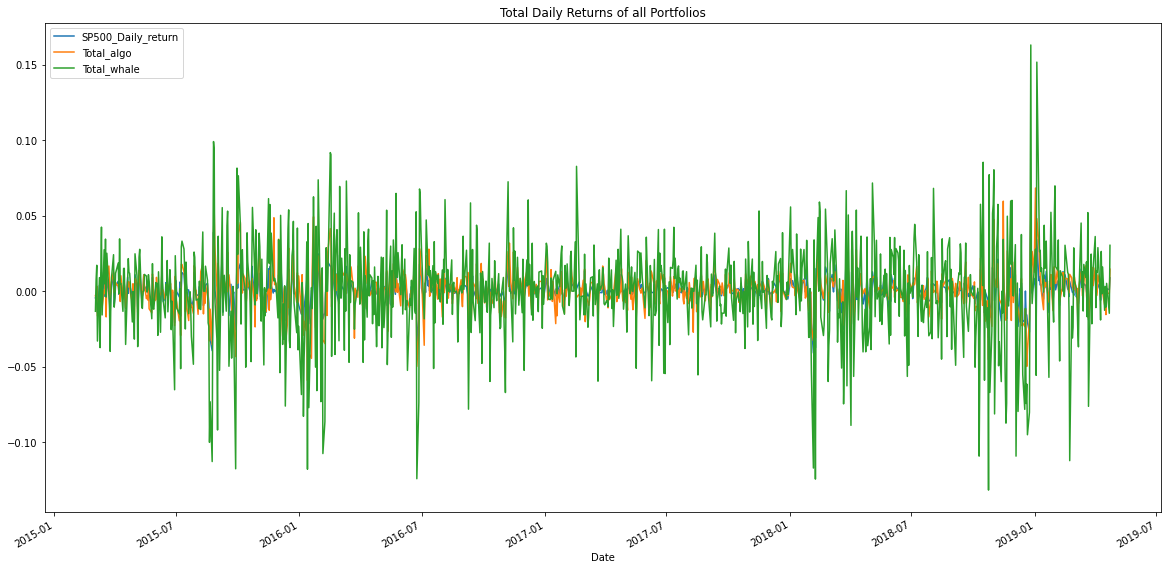

In [2]:
# Import dependencies, read and format data for analysis:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
from _functions import *
%matplotlib inline

whale_file_path = Path("Data/whale_returns.csv")
whale_df = pd.read_csv(whale_file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_df = whale_df.dropna()
print(f'Manual null values: {whale_df.isnull().sum()}')

algo_file_path = Path("Data/algo_returns.csv")
algo_df = pd.read_csv(algo_file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_df = algo_df.dropna()
print(f'Algo null values: {algo_df.isnull().sum()}')

sp_file_path = Path("Data/sp500_history.csv")
sp_df = pd.read_csv(sp_file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp_df.sort_index(inplace=True)
sp_df['Close'] = sp_df['Close'].str.replace('$', '')
sp_df['Close'] = sp_df['Close'].astype('float')
print('')
print('S&P Data:')
print(sp_df.dtypes, sp_df['Close'])

newmont_file_path = Path("Data/NEM.csv")
nem_df = pd.read_csv(newmont_file_path, parse_dates=True, infer_datetime_format=True)
nem_df['Date'] = pd.to_datetime(nem_df['Date']).dt.date
nem_df = nem_df.set_index('Date')
nem_df = nem_df.dropna()
print(f'Null counts for first ticker:{nem_df.isnull().sum()}')

gold_file_path = Path("Data/GOLD.csv")
gold_df = pd.read_csv(gold_file_path, parse_dates=True, infer_datetime_format=True)
gold_df['Date'] = pd.to_datetime(gold_df['Date']).dt.date
gold_df = gold_df.set_index('Date')
gold_df = gold_df.dropna()
print(f'Null counts for second ticker:{gold_df.isnull().sum()}')


francoNV_file_path = Path("Data/FNV.csv")
franco_df = pd.read_csv(francoNV_file_path, parse_dates=True, infer_datetime_format=True)
franco_df['Date'] = pd.to_datetime(franco_df['Date']).dt.date
franco_df = franco_df.set_index('Date')
franco_df = franco_df.dropna()
print(f'Null counts for third ticker: {franco_df.isnull().sum()}')

custom_portfolio = pd.concat([nem_df,gold_df,franco_df], axis="columns", join="inner")
custom_portfolio.sort_index(inplace=True)
custom_portfolio.columns = ['NEM', 'GOLD', 'FNV']


custom_portfolio['NEM_returns'] = custom_portfolio['NEM'].pct_change()
custom_portfolio['GOLD_returns'] = custom_portfolio['GOLD'].pct_change()
custom_portfolio['FNV_returns'] = custom_portfolio['FNV'].pct_change()

custom_portfolio = custom_portfolio.dropna()

custom_portfolio = custom_portfolio.drop(columns=['NEM','GOLD','FNV'])


sp_df['Daily_Return'] = sp_df.pct_change()
sp_df['Daily_Return'] = sp_df['Daily_Return'].fillna(0)
sp_df.to_csv('Data/sp500_history_modified.csv')
print(f'S&P null values: {sp_df.isnull().sum()}')

sp_df.to_csv('Data/sp500_history_modified.csv')
modified_sp_file_path = Path("Data/sp500_history_modified.csv")
new_sp_df = pd.read_csv(modified_sp_file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
col_names = ["SP500_Close", "SP500_Daily_return"]
new_sp_df.columns = col_names

total_dataset = pd.concat([new_sp_df,algo_df,whale_df], axis='columns', join='inner')
total_dataset['Total_algo'] = total_dataset['Algo 1'] + total_dataset['Algo 2']
total_dataset['Total_whale'] = total_dataset['SOROS FUND MANAGEMENT LLC'] + total_dataset['PAULSON & CO.INC. '] + total_dataset['TIGER GLOBAL MANAGEMENT LLC'] + total_dataset['BERKSHIRE HATHAWAY INC']
total_dataset.drop(columns=['SP500_Close', 'Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'], inplace=True)
total_dataset.sort_index(inplace=True)
rolling_sp_variance = total_dataset['SP500_Daily_return'].rolling(window=60).var()
total_dataset.plot(figsize=(20,10),title='Total Daily Returns of all Portfolios')

#### Visualize returns from all portfolios:

---

### Conduct Quantitative & Risk Analysis

#### Cumulative Returns

Total returns:



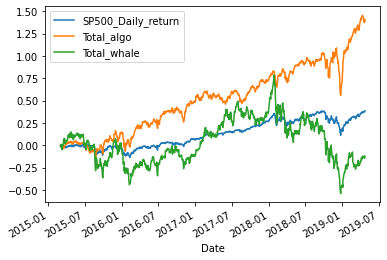

In [3]:
cumulative_returns = (1 + total_dataset).cumprod() -1
print('Total returns:')
cumulative_returns.plot()
print('')

---

#### Visualizing Risk (standard deviation) with Boxplot:

Risk Analysis


<AxesSubplot:>

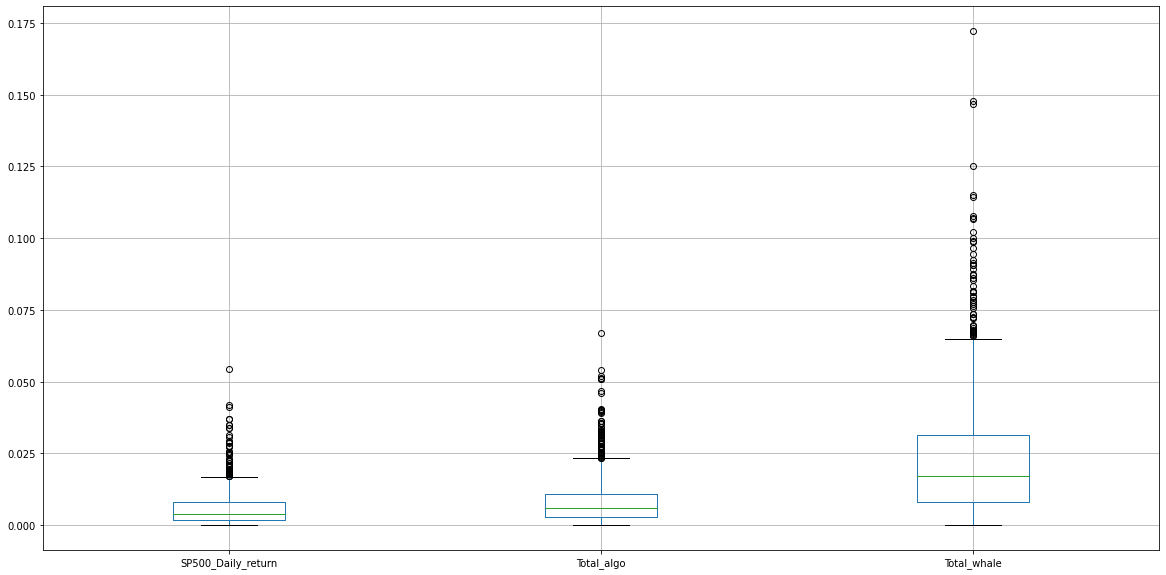

In [4]:
# Box plot to visually show risk
print('Risk Analysis')
total_dataset.rolling(window=2).std().boxplot(figsize=(20,10))

#### Analyze standard deviation

Whale's Portfolio..
would be considered higher risk due to higher standard deviation when compared to S&P500
Algo's Portfolio..
would be considered higher risk due to higher standard deviation when compared to S&P500


<AxesSubplot:xlabel='Date'>

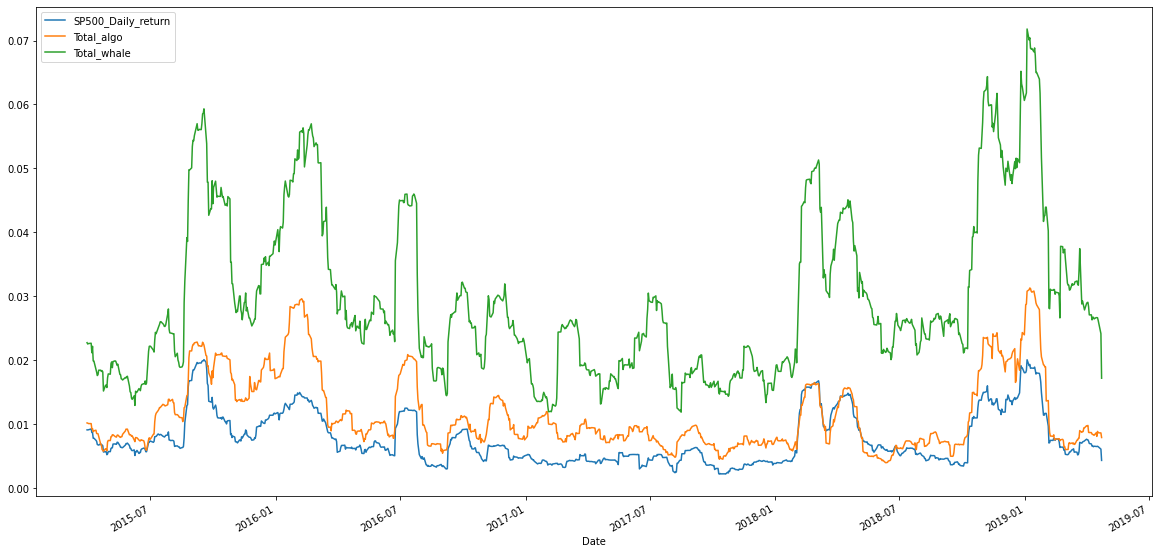

In [5]:
algo_std_dev = np.std(total_dataset['Total_algo'])
whale_std_dev = np.std(total_dataset['Total_whale'])
sp_std_dev = np.std(total_dataset['SP500_Daily_return'])
sp_std_dev = np.std(total_dataset['SP500_Daily_return'])
def risky_portfolios(portfolioA, sp500):
    if portfolioA > sp500:
        print("would be considered higher risk due to higher standard deviation when compared to S&P500")
    else:
        print("would be considered lower risk due to lower standard deviation when compared to S&P500")
print(f"Whale's Portfolio..")
risky_portfolios(whale_std_dev,sp_std_dev)
print(f"Algo's Portfolio..")
risky_portfolios(algo_std_dev,sp_std_dev)
volatility = total_dataset.std() * np.sqrt(252)
total_dataset.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the Correlation

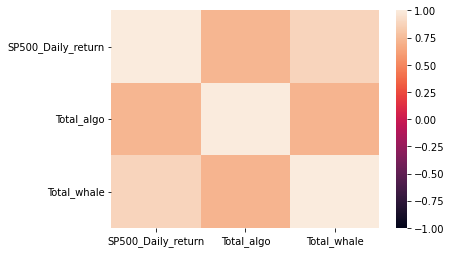

In [6]:
corr_heatmap(total_dataset)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: SP500_Daily_return, Length: 1043, dtype: float64

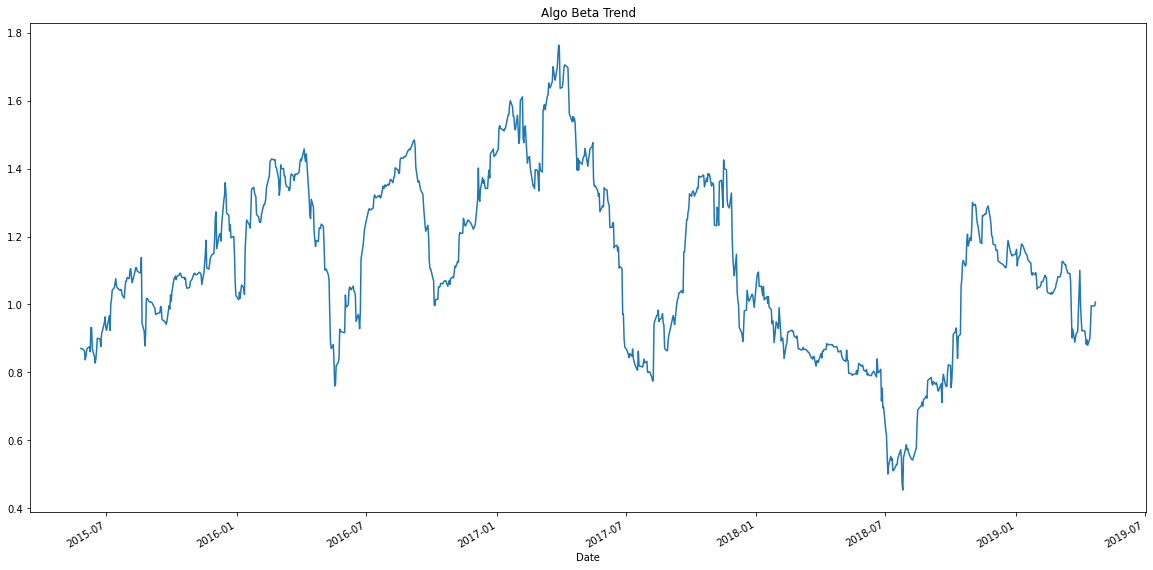

In [7]:
plot_beta(total_dataset)

---

#### Rolling Statistics with Exponentially Weighted Average 

Sharpe Ratios:


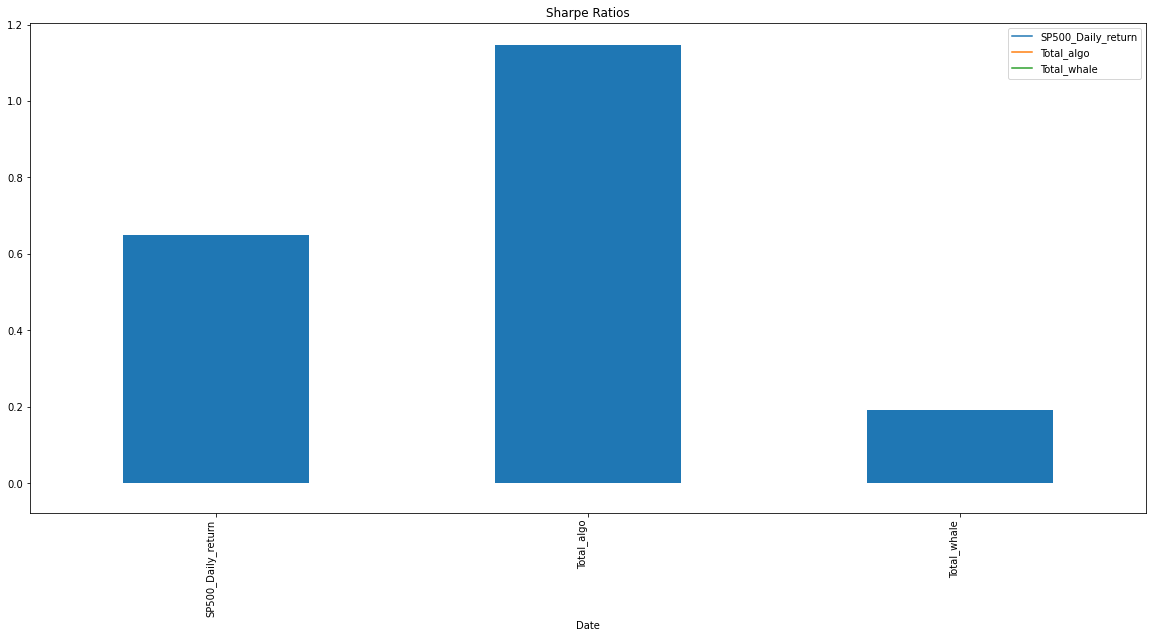

In [8]:
sharp_ratio(total_dataset)

---

---

###### Analysis: Algorithmic strategies has a much higher Sharpe ratio indicating this portfolio yielded more reward when compared to both the market (S&P 500) and the Whales portfolio. The Whale portfolio has a much higher standard deviation (indicating more risk) and lower Sharpe ratio (indicating less reward for the risk assumed) proving that this portfolio stronly underperforms both the market (S&P 500) and Algorithmic strategies.

### Here we create a custom portfolio based on *Gold* sector and rerun the same analysis as above

#### Newmont Goldcorp, NEM
#### Barrick Gold, GOLD
#### Franco-Nevada, FNV

In [9]:
newmont_file_path = Path("Data/NEM.csv")
nem_df = pd.read_csv(newmont_file_path, parse_dates=True, infer_datetime_format=True)
nem_df['Date'] = pd.to_datetime(nem_df['Date']).dt.date
nem_df = nem_df.set_index('Date')
nem_df = nem_df.dropna()
print(f'Null counts for first ticker:{nem_df.isnull().sum()}')

# Reading data from 2nd stock
gold_file_path = Path("Data/GOLD.csv")
gold_df = pd.read_csv(gold_file_path, parse_dates=True, infer_datetime_format=True)
gold_df['Date'] = pd.to_datetime(gold_df['Date']).dt.date
gold_df = gold_df.set_index('Date')
gold_df = gold_df.dropna()
print(f'Null counts for second ticker:{gold_df.isnull().sum()}')

# Reading data from 3rd stock
francoNV_file_path = Path("Data/FNV.csv")
franco_df = pd.read_csv(francoNV_file_path, parse_dates=True, infer_datetime_format=True)
franco_df['Date'] = pd.to_datetime(franco_df['Date']).dt.date
franco_df = franco_df.set_index('Date')
franco_df = franco_df.dropna()
print(f'Null counts for third ticker: {franco_df.isnull().sum()}')

# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([nem_df,gold_df,franco_df], axis="columns", join="inner")
# Reset Date index
custom_portfolio.sort_index(inplace=True)
# Reorganize portfolio data by having a column per symbol
custom_portfolio.columns = ['NEM', 'GOLD', 'FNV']

# Calculate daily returns
custom_portfolio['NEM_returns'] = custom_portfolio['NEM'].pct_change()
custom_portfolio['GOLD_returns'] = custom_portfolio['GOLD'].pct_change()
custom_portfolio['FNV_returns'] = custom_portfolio['FNV'].pct_change()

# Drop NAs
custom_portfolio = custom_portfolio.dropna()
custom_portfolio = custom_portfolio.drop(columns=['NEM','GOLD','FNV'])

Null counts for first ticker:Close    0
dtype: int64
Null counts for second ticker:Close    0
dtype: int64
Null counts for third ticker: Close    0
dtype: int64


### Plotting the Standard Deviation

<AxesSubplot:xlabel='Date'>

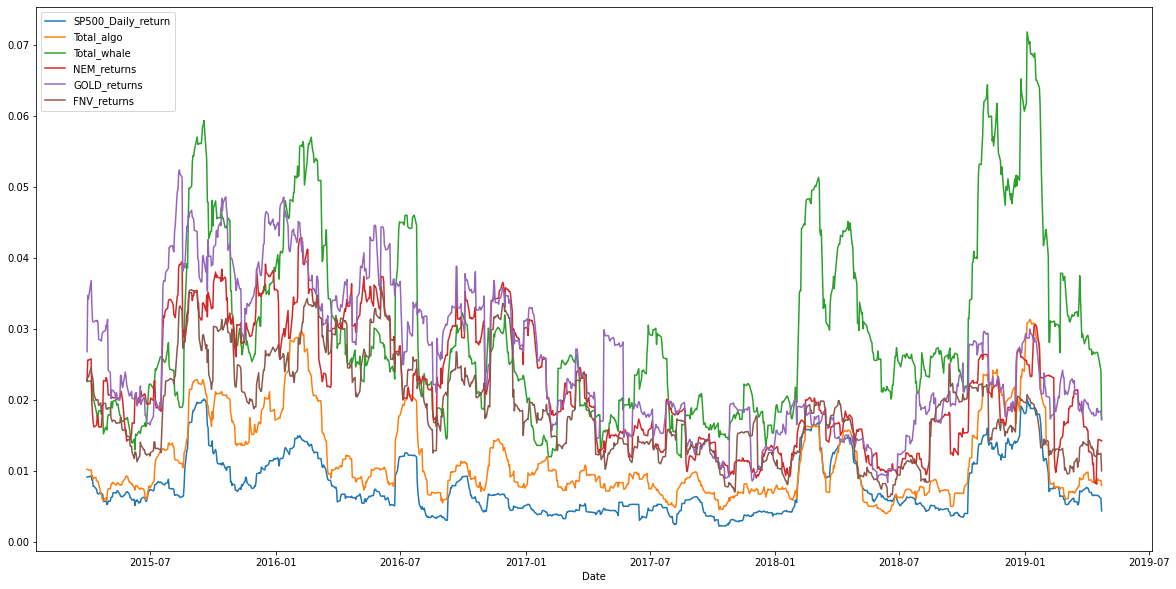

In [10]:
final_portfolios = rolling_std(total_dataset,custom_portfolio)
final_volatility = final_portfolios.std() * np.sqrt(252)
final_portfolios.rolling(window=21).std().plot(figsize=(20,10))

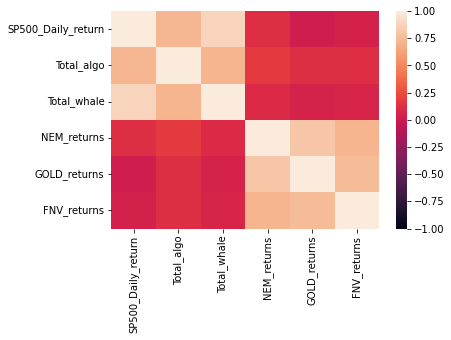

In [11]:
corr_heatmap(final_portfolios)

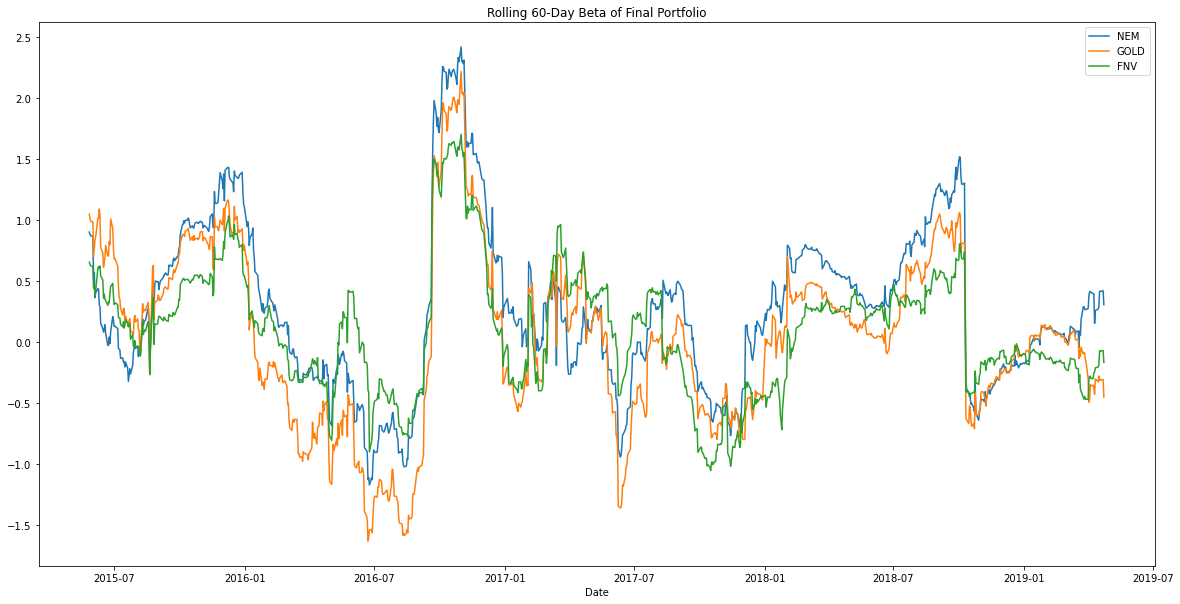

In [12]:
# Calculate and plot Beta
nem_covariance_60roll = final_portfolios['NEM_returns'].rolling(window=60).cov(final_portfolios['SP500_Daily_return'])
gold_covariance_60roll = final_portfolios['GOLD_returns'].rolling(window=60).cov(final_portfolios['SP500_Daily_return'])
fnv_covariance_60roll = final_portfolios['FNV_returns'].rolling(window=60).cov(final_portfolios['SP500_Daily_return'])
nem_beta_60roll = nem_covariance_60roll/rolling_sp_variance
gold_beta_60roll = gold_covariance_60roll/rolling_sp_variance
fnv_beta_60roll = fnv_covariance_60roll/rolling_sp_variance
ax = nem_beta_60roll.plot(figsize=(20,10), title='Rolling 60-Day Beta of Final Portfolio')
gold_beta_60roll.plot(ax=ax)
fnv_beta_60roll.plot(ax=ax)
ax.legend(['NEM','GOLD','FNV'])

<AxesSubplot:title={'center':'Final Sharpe Ratios'}>

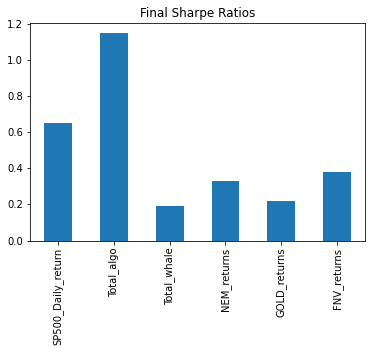

In [13]:
# Calculate Annualzied Sharpe Ratios
final_sharpe_ratios = (final_portfolios.mean() * 252) / final_volatility
# Visualize the sharpe ratios as a bar plot
final_sharpe_ratios.plot.bar(title='Final Sharpe Ratios')

###### Analysis: Algorithmic strategies has a much higher Sharpe ratio compared to the other portfolios indicating it is a smarter investment based on the risk to reward ratio. The customized portfolio ('gold' sector stocks) outperformes the Whale portfolio, but has no comparison to Algorithmic strategies.